In [8]:
cd /content/drive/MyDrive/GDDA708/Assignment2_final/

/content/drive/MyDrive/GDDA708/Assignment2_final


In [8]:
ls

708Final_classification.ipynb  Churn_Modelling.csv


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy.stats import randint

In [28]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')


In [29]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [31]:
# Drop the unwanted columns
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [22]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


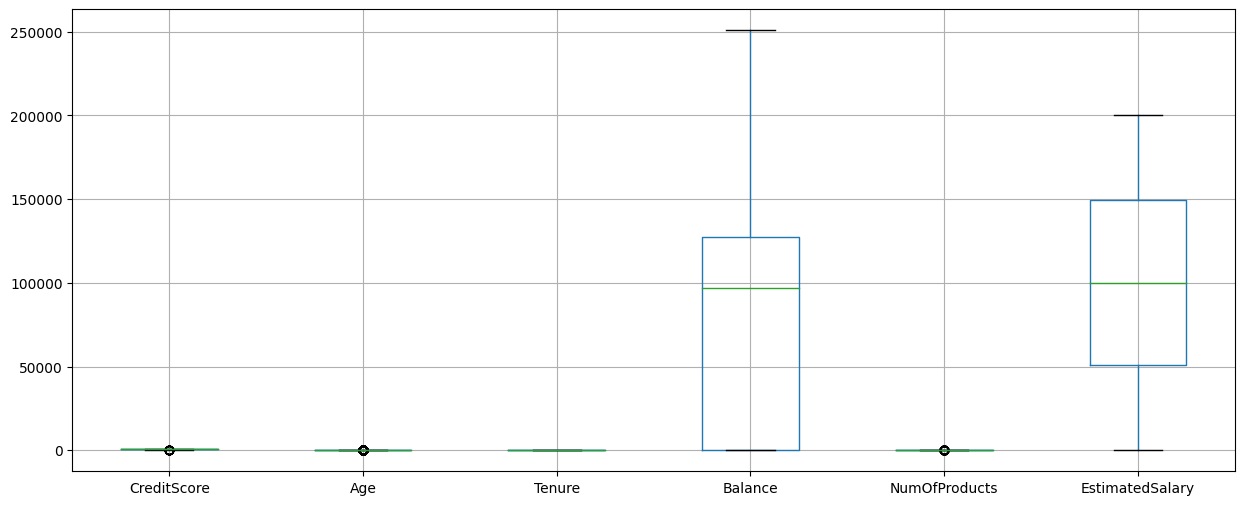

In [23]:

# Specify the numerical columns
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Plot box plots for these numerical columns
plt.figure(figsize=(15, 6))
df[numerical_columns].boxplot()
plt.show()

In [32]:
# Calculate Z-scores for numerical columns
z_scores = df[numerical_columns].apply(zscore)

# Keep rows where Z-scores are less than 3 in absolute value (i.e., remove outliers)
df = df[(z_scores < 3).all(axis=1)]

In [25]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
# Specify the numerical columns
Columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Apply Min-Max Scaling
df[numerical_columns] = MinMaxScaler().fit_transform(df[numerical_columns])

# Display the first few rows to confirm
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.461538,0.2,0.000000,0.0,1.0,1,0.506735,1
1,0.516,Spain,Female,0.442308,0.1,0.334031,0.0,0.0,1,0.562709,0
2,0.304,France,Female,0.461538,0.8,0.636357,1.0,1.0,0,0.569654,1
3,0.698,France,Female,0.403846,0.1,0.000000,0.5,0.0,0,0.469120,0
4,1.000,Spain,Female,0.480769,0.2,0.500246,0.0,1.0,1,0.395400,0


In [34]:
# Identify categorical columns to encode
categorical_columns = ['Geography', 'Gender']

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows to confirm
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.461538,0.2,0.000000,0.0,1.0,1,0.506735,1,False,False,False
1,0.516,0.442308,0.1,0.334031,0.0,0.0,1,0.562709,0,False,True,False
2,0.304,0.461538,0.8,0.636357,1.0,1.0,0,0.569654,1,False,False,False
3,0.698,0.403846,0.1,0.000000,0.5,0.0,0,0.469120,0,False,False,False
4,1.000,0.480769,0.2,0.500246,0.0,1.0,1,0.395400,0,False,True,False


In [35]:
#distinguishing target variable and the features
X = df.drop(columns=['Exited'])
y = df['Exited']

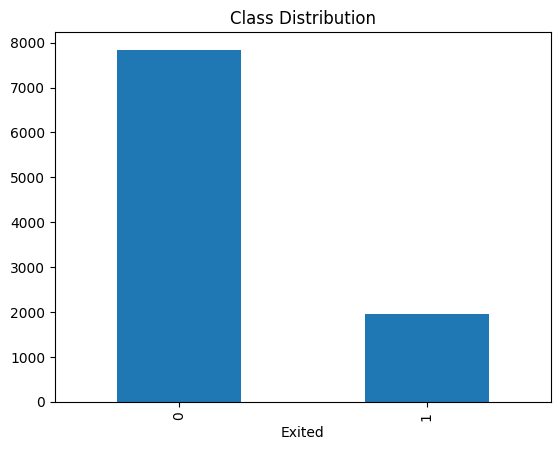

In [36]:
# visualize the class distribution
df['Exited'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the new class distribution in the training set
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution after SMOTE:
Exited
0    6278
1    6278
Name: count, dtype: int64


In [39]:
# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')



In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from scipy.stats import randint

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[[1404  159]
 [ 165  234]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1563
           1       0.60      0.59      0.59       399

    accuracy                           0.83      1962
   macro avg       0.75      0.74      0.74      1962
weighted avg       0.83      0.83      0.83      1962



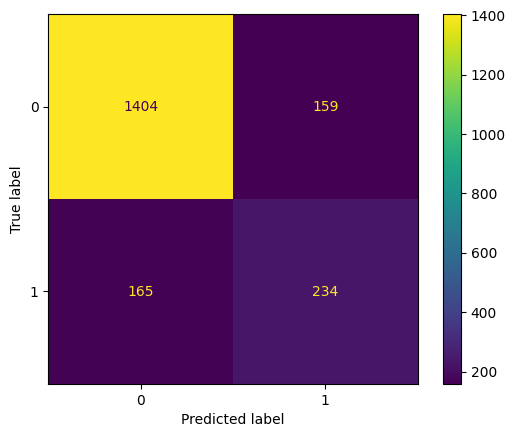

Best Parameters Found by Random Search: {'max_depth': 38, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 938}


In [42]:
# Define the hyperparameter grid for Randomized Search
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),

}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=3,
                                   random_state=42, n_jobs=-1, verbose=2, scoring='f1')

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best model

best_rf = random_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_rf.classes_)
disp.plot(cmap='viridis')
plt.show()

# Print the best parameters
print("Best Parameters Found by Random Search:", random_search.best_params_)

In [46]:
from sklearn.model_selection import cross_validate

# Performing 5-fold cross-validation and calculate multiple metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(best_rf, X_train_resampled, y_train_resampled, cv=5, scoring=scoring, n_jobs=-1, verbose=2)

#extracting the scores
accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision']
recall_scores = cv_results['test_recall']
f1_scores = cv_results['test_f1']

#calculating average scores
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1_score = np.mean(f1_scores)

#displaying results
print(f"Cross-Validation Accuracy Scores: {accuracy_scores}")
print(f"Mean Accuracy Score: {mean_accuracy}")
print(f"Cross-Validation Precision Scores: {precision_scores}")
print(f"Mean Precision Score: {mean_precision}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Cross-Validation Accuracy Scores: [0.83359873 0.89247312 0.92632417 0.92194345 0.91557149]
Mean Accuracy Score: 0.8979821904638697
Cross-Validation Precision Scores: [0.88229927 0.89368505 0.90165165 0.89201183 0.88897168]
Mean Precision Score: 0.8917238984112512


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished
